In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import gzip
import json
import datetime

# Function to read a gzipped JSON file
def read_gzipped_json(file_name):
    with gzip.open(file_name, 'rt', encoding='utf-8') as zipfile:
        data = [json.loads(line) for line in zipfile]
    return data

# Load the data into a DataFrame
file_name = r"review-District_of_Columbia_10.json.gz"
data = read_gzipped_json(file_name)
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


                 user_id            name           time  rating  \
0  104256407771930872120       Petre Ene  1551027526726       4   
1  108642560086289718425  Keshava Mysore  1510920735052       4   
2  111842880135815090774         Carol G  1543249586598       2   
3  110299397397951052863              翟泉  1496597796978       4   
4  116447973760719145759       Kitae Yim  1540701399450       1   

                                                text  \
0  the food is really good, I had a great experie...   
1  High prices for not so big portions! But I thi...   
2  The gelato looked "old" and ended up having co...   
3  (Translated by Google) The fast food restauran...   
4  (Translated by Google) The food is barely edib...   

                                                pics  resp  \
0  [{'url': ['https://lh5.googleusercontent.com/p...  None   
1                                               None  None   
2                                               None  None   
3  [{'url': 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,104256407771930872120,Petre Ene,1551027526726,4,"the food is really good, I had a great experie...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
1,108642560086289718425,Keshava Mysore,1510920735052,4,High prices for not so big portions! But I thi...,None,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
2,111842880135815090774,Carol G,1543249586598,2,"The gelato looked ""old"" and ended up having co...",None,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
3,110299397397951052863,翟泉,1496597796978,4,(Translated by Google) The fast food restauran...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27
4,116447973760719145759,Kitae Yim,1540701399450,1,(Translated by Google) The food is barely edib...,None,None,0x89b7b7851b06ef6b:0x5f356b1eb1da27


In [4]:
df['resp'].fillna('', inplace=True)

In [5]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,104256407771930872120,Petre Ene,1551027526726,4,"the food is really good, I had a great experie...",[{'url': ['https://lh5.googleusercontent.com/p...,,0x89b7b7851b06ef6b:0x5f356b1eb1da27
1,108642560086289718425,Keshava Mysore,1510920735052,4,High prices for not so big portions! But I thi...,None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27
2,111842880135815090774,Carol G,1543249586598,2,"The gelato looked ""old"" and ended up having co...",None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27
3,110299397397951052863,翟泉,1496597796978,4,(Translated by Google) The fast food restauran...,[{'url': ['https://lh5.googleusercontent.com/p...,,0x89b7b7851b06ef6b:0x5f356b1eb1da27
4,116447973760719145759,Kitae Yim,1540701399450,1,(Translated by Google) The food is barely edib...,None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27


In [6]:
df.dtypes

user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object

In [7]:
df['time'].isna().sum()

0

In [8]:
df['time'] = pd.to_datetime(df['time'], unit='ms')

In [9]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [10]:
df['hour'].isna().sum()

0

BASIC STATISTICS

In [11]:
df.describe()

,time,rating,year,month,day,hour,minute
count,564783,564783.000000,564783.000000,564783.000000,564783.000000,564783.000000,564783.000000
mean,2018-10-03 07:39:26.674180864,4.328315,2018.258149,6.476824,15.665514,12.637080,29.460927
min,1990-12-31 00:00:00,1.000000,1990.000000,1.000000,1.000000,0.000000,0.000000
25%,2017-12-23 17:45:14.056499968,4.000000,2017.000000,3.000000,8.000000,4.000000,15.000000
50%,2018-12-05 23:01:48.284000,5.000000,2018.000000,7.000000,16.000000,14.000000,29.000000
75%,2019-09-09 19:13:34.412000,5.000000,2019.000000,9.000000,23.000000,19.000000,44.000000
max,2021-09-08 00:15:04.734000,5.000000,2021.000000,12.000000,31.000000,23.000000,59.000000
std,NaN,0.976218,1.449832,3.488327,8.757058,7.596888,17.331482



Distribution of Ratings:
rating
5    326892
4    145553
3     59464
2     16621
1     16253
Name: count, dtype: int64


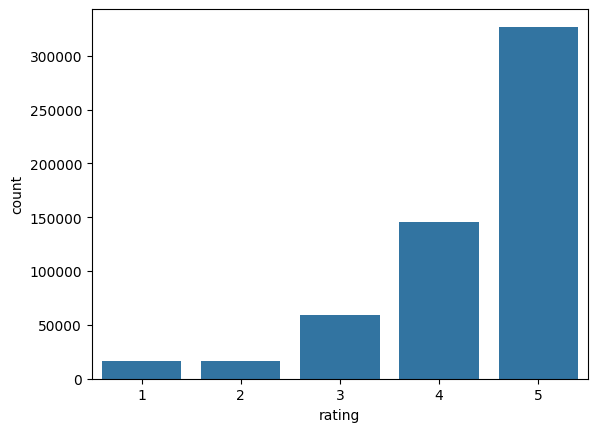

In [12]:
print("\nDistribution of Ratings:")
print(df['rating'].value_counts())
sns.countplot(x='rating', data=df)
plt.show()

In [13]:
len(df)

564783

In [14]:
# Drop rows from df where 'text' is NaN
df.dropna(subset=['text'], inplace=True)

In [15]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,year,month,day,hour,minute
0,104256407771930872120,Petre Ene,2019-02-24 16:58:46.726,4,"the food is really good, I had a great experie...",[{'url': ['https://lh5.googleusercontent.com/p...,,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2019,2,24,16,58
1,108642560086289718425,Keshava Mysore,2017-11-17 12:12:15.052,4,High prices for not so big portions! But I thi...,None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2017,11,17,12,12
2,111842880135815090774,Carol G,2018-11-26 16:26:26.598,2,"The gelato looked ""old"" and ended up having co...",None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2018,11,26,16,26
3,110299397397951052863,翟泉,2017-06-04 17:36:36.978,4,(Translated by Google) The fast food restauran...,[{'url': ['https://lh5.googleusercontent.com/p...,,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2017,6,4,17,36
4,116447973760719145759,Kitae Yim,2018-10-28 04:36:39.450,1,(Translated by Google) The food is barely edib...,None,,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2018,10,28,4,36


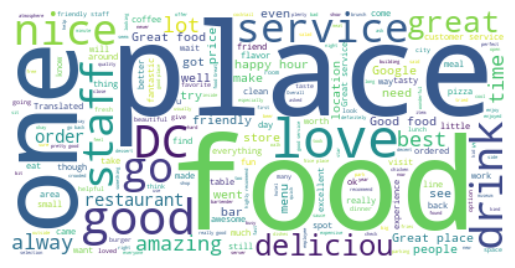

In [16]:
text = " ".join(review for review in df['text'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df.shape

(294462, 13)

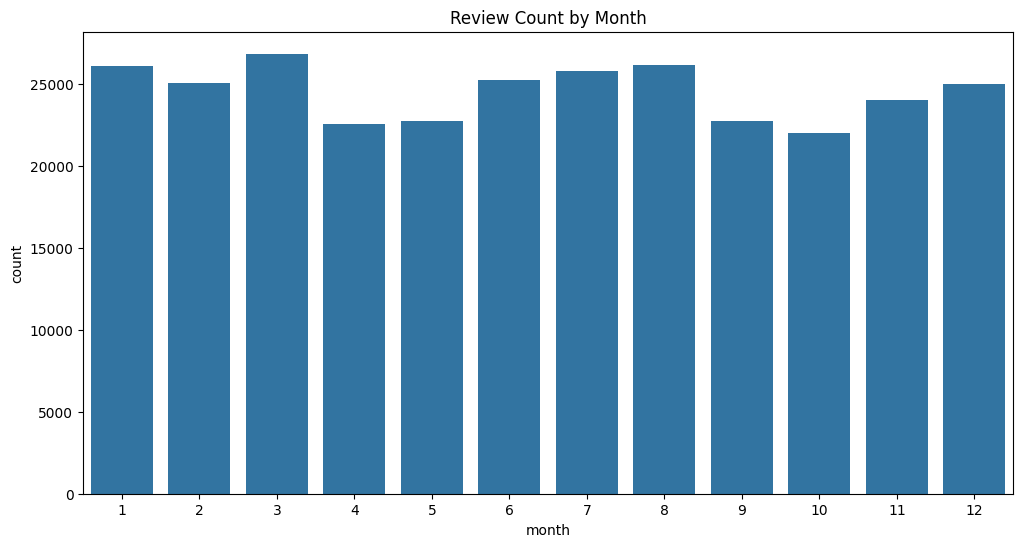

In [18]:
# Temporal Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title("Review Count by Month")
plt.show()

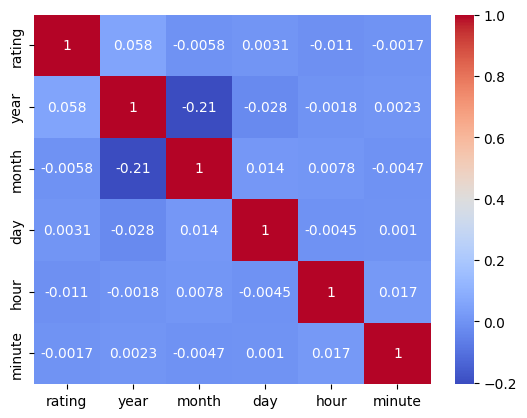

In [19]:
sns.heatmap(df.select_dtypes(include=['int64','int32','float64']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
#We can see that there is not much correlation with date features with rating.

In [21]:
tfidf = TfidfVectorizer(max_features=100)  # Adjust the number of features
tfidf_features = tfidf.fit_transform(df['text'].fillna(''))

In [22]:
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])

In [23]:
tfidf_df.head()

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.374627,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.264584,0.00000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.217068,0.0,0.0,0.0,0.0,0.205561,0.53227,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.210242,0.00000,0.000000,0.0,...,0.0,0.219757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df['review_length'] = df['text'].fillna('').apply(len)

In [25]:
df['text'].isna().sum()

0

In [26]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'year', 'month', 'day', 'hour', 'minute', 'review_length'],
      dtype='object')

In [27]:
# Time of day (morning, afternoon, evening, night)
hour_bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['time_of_day'] = pd.cut(df['hour'], bins=hour_bins, labels=labels, right=False)

In [28]:
df['hour'].isna().sum()

0

In [29]:
df['len_of_response']=df['resp'].apply(len)

In [30]:
df['resp']=df['resp'].apply(lambda x:1 if len(x)>0 else 0)

In [31]:
df['pics'].fillna('', inplace=True)

In [32]:
df['pics']=df['pics'].apply(lambda x:1 if len(x)>0 else 0)

In [33]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'year', 'month', 'day', 'hour', 'minute', 'review_length',
       'time_of_day', 'len_of_response'],
      dtype='object')

In [34]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,year,month,day,hour,minute,review_length,time_of_day,len_of_response
0,104256407771930872120,Petre Ene,2019-02-24 16:58:46.726,4,"the food is really good, I had a great experie...",1,0,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2019,2,24,16,58,75,Afternoon,0
1,108642560086289718425,Keshava Mysore,2017-11-17 12:12:15.052,4,High prices for not so big portions! But I thi...,0,0,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2017,11,17,12,12,156,Afternoon,0
2,111842880135815090774,Carol G,2018-11-26 16:26:26.598,2,"The gelato looked ""old"" and ended up having co...",0,0,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2018,11,26,16,26,51,Afternoon,0
3,110299397397951052863,翟泉,2017-06-04 17:36:36.978,4,(Translated by Google) The fast food restauran...,1,0,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2017,6,4,17,36,273,Afternoon,0
4,116447973760719145759,Kitae Yim,2018-10-28 04:36:39.450,1,(Translated by Google) The food is barely edib...,0,0,0x89b7b7851b06ef6b:0x5f356b1eb1da27,2018,10,28,4,36,383,Night,0


In [35]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])
df['season'] = df['datetime'].dt.month % 12 // 3 + 1  # 1:Winter, 2:Spring, 3:Summer, 4:Fall
df['weekday'] = df['datetime'].dt.weekday  # Monday=0, Sunday=6
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['season', 'weekday'])

# Now drop the original columns if no longer needed
df.drop(['year', 'month', 'day', 'datetime'], axis=1, inplace=True)

In [36]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'hour', 'minute', 'review_length', 'time_of_day', 'len_of_response',
       'is_weekend', 'season_1', 'season_2', 'season_3', 'season_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [37]:
df=pd.get_dummies(df, columns=['time_of_day'])


In [38]:
df.drop(['user_id','name','time','gmap_id','hour','minute'],inplace=True,axis=1)
df.head()

,rating,text,pics,resp,review_length,len_of_response,is_weekend,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening
0,4,"the food is really good, I had a great experie...",1,0,75,0,1,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,4,High prices for not so big portions! But I thi...,0,0,156,0,0,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,"The gelato looked ""old"" and ended up having co...",0,0,51,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,4,(Translated by Google) The fast food restauran...,1,0,273,0,1,False,False,True,...,False,False,False,False,False,True,False,False,True,False
4,1,(Translated by Google) The food is barely edib...,0,0,383,0,1,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [39]:
tfidf_df.shape

(294462, 100)

In [40]:
df.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

In [41]:
df_combined = pd.concat([df, tfidf_df], axis=1)

We have added features like length of review,length of response, response given or not, pics are there are not, season, weekday or not, and TF-IDF features

In [42]:
df_combined.columns

Index(['rating', 'text', 'pics', 'resp', 'review_length', 'len_of_response',
       'is_weekend', 'season_1', 'season_2', 'season_3',
       ...
       'tfidf_90', 'tfidf_91', 'tfidf_92', 'tfidf_93', 'tfidf_94', 'tfidf_95',
       'tfidf_96', 'tfidf_97', 'tfidf_98', 'tfidf_99'],
      dtype='object', length=122)

In [43]:
df.columns

Index(['rating', 'text', 'pics', 'resp', 'review_length', 'len_of_response',
       'is_weekend', 'season_1', 'season_2', 'season_3', 'season_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'time_of_day_Night', 'time_of_day_Morning',
       'time_of_day_Afternoon', 'time_of_day_Evening'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'rating' is your target variable
X = df_combined.drop(['text','rating'], axis=1)
y = df_combined['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           1       0.13      0.26      0.17      2393
           2       0.04      0.01      0.01      2143
           3       0.19      0.03      0.06      5785
           4       0.34      0.06      0.10     14031
           5       0.61      0.90      0.73     34541

    accuracy                           0.55     58893
   macro avg       0.26      0.25      0.21     58893
weighted avg       0.47      0.55      0.46     58893


Confusion Matrix:
[[  619     2    67    55  1650]
 [  510    14    99    93  1427]
 [  664    52   187   356  4526]
 [ 1053    96   297   819 11766]
 [ 2026   148   325  1103 30939]]


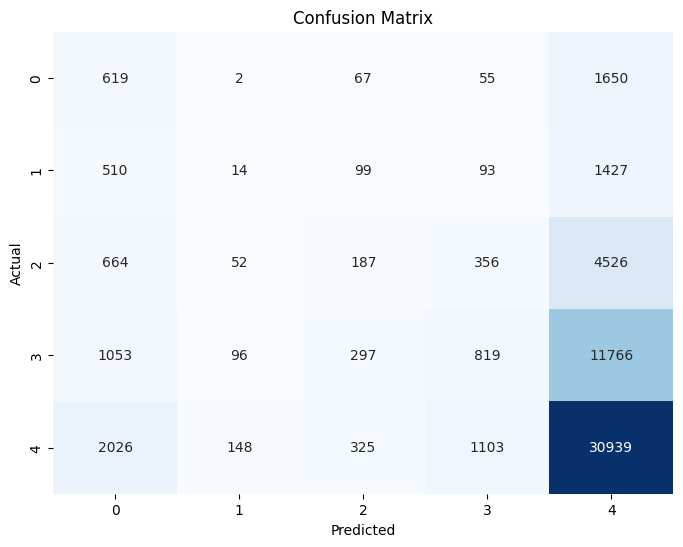

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Display the confusion matrix using seaborn's heatmap
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'rating' is your target variable
X = df_combined.drop(['text','rating'], axis=1)
y = df_combined['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a colorful confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KeyboardInterrupt: 

Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.22      0.22      2393
           2       0.15      0.14      0.14      2143
           3       0.21      0.22      0.22      5785
           4       0.31      0.32      0.31     14031
           5       0.68      0.68      0.68     34541

    accuracy                           0.51     58893
   macro avg       0.31      0.31      0.31     58893
weighted avg       0.51      0.51      0.51     58893



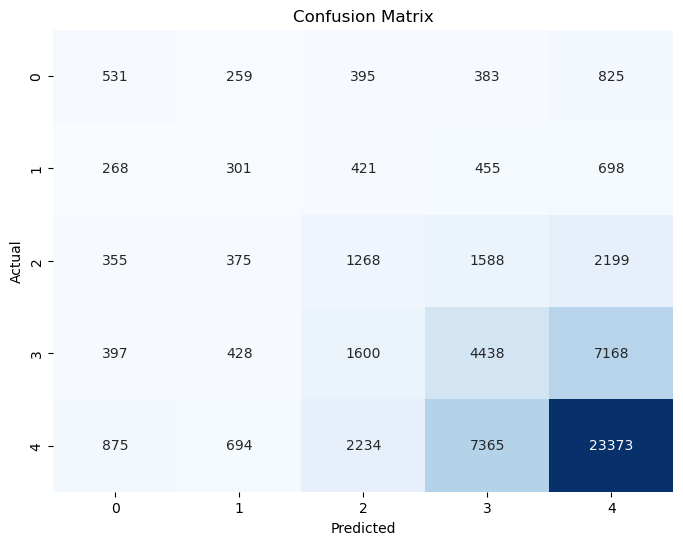

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'rating' is your target variable
X = df_combined.drop(['text','rating'], axis=1)
y = df_combined['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a colorful confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'rating' is your target variable
X = df_combined.drop(['text','rating'], axis=1)
y = df_combined['rating']

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Scale the 'review_length' and 'len_of_response' features
scaler = StandardScaler()
X_train_2[['review_length', 'len_of_response']] = scaler.fit_transform(X_train_2[['review_length', 'len_of_response']])
X_test_2[['review_length', 'len_of_response']] = scaler.transform(X_test_2[['review_length', 'len_of_response']])


In [ ]:

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_2, y_train_2)

# Make predictions on the test set
y_pred_2 = logreg_model.predict(X_test_2)


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.21      0.29      2393
           2       0.37      0.01      0.02      2143
           3       0.32      0.13      0.18      5785
           4       0.44      0.18      0.26     14031
           5       0.65      0.93      0.77     34541

    accuracy                           0.61     58893
   macro avg       0.44      0.29      0.30     58893
weighted avg       0.55      0.61      0.54     58893



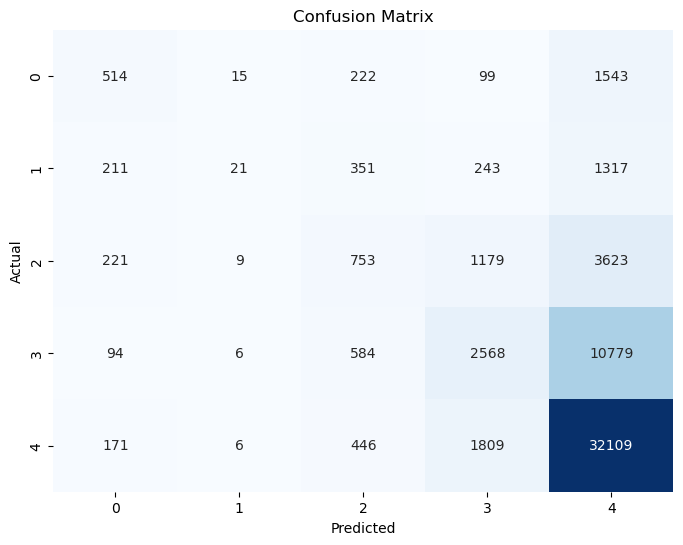

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_2))

# Display a colorful confusion matrix
conf_mat = confusion_matrix(y_test_2, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
